In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import json

In [5]:
players_df = pd.read_csv("players_stats_by_season_full_details.csv")
players2 = players_df[["Player", "Team", "GP", "MIN", "FGM", "FGA","3PM","ORB","DRB","REB","AST","STL","BLK","PTS","height_cm"]]
players2


,Player,Team,GP,MIN,FGM,FGA,3PM,ORB,DRB,REB,AST,STL,BLK,PTS,height_cm
0,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,336,742,1078,299,36,239,2344,216.0
1,Vince Carter,TOR,82,3126.0,788,1696,95,150,326,476,322,110,92,2107,198.0
2,Karl Malone,UTA,82,2947.0,752,1476,2,169,610,779,304,79,71,2095,206.0
3,Allen Iverson,PHI,70,2853.0,729,1733,89,71,196,267,328,144,5,1989,183.0
4,Gary Payton,SEA,82,3425.0,747,1666,177,100,429,529,732,153,18,1982,193.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53944,Kyrylo Meshheryakov,MYK,15,127.0,7,28,2,4,14,18,8,1,3,19,198.0
53945,Yaroslav Kadygrob,ODE,10,81.7,5,16,4,2,4,6,3,0,0,15,191.0
53946,Ernesto Tkachuk,ODE,16,124.7,1,15,0,0,15,15,10,6,1,9,188.0
53947,Andrij Shapovalov,KHAR,12,59.2,0,8,0,1,4,5,3,1,0,3,188.0


In [7]:
#Crosstab
byRegion = pd.crosstab(players2["ORB"], players2["DRB"])
byRegion

DRB,0,1,2,3,4,5,6,7,8,9,...,816,829,833,842,848,853,858,861,882,894
ORB,,,,,,,,,,,,,,,,,,,,,
0,23,16,29,35,24,38,44,26,28,30,...,0,0,0,0,0,0,0,0,0,0
1,9,14,36,26,42,34,52,50,47,47,...,0,0,0,0,0,0,0,0,0,0
2,3,11,20,21,25,37,44,56,64,42,...,0,0,0,0,0,0,0,0,0,0
3,5,5,9,16,12,30,41,37,44,44,...,0,0,0,0,0,0,0,0,0,0
4,2,0,4,10,11,20,27,28,39,43,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


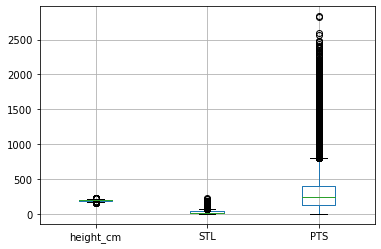

In [18]:
#Box plots
players2.boxplot(column=["height_cm", "STL", "PTS"])

players2.describe()



In [27]:
max_df = players2.loc[players2["AST"] == 925]
max_df

,Player,Team,GP,MIN,FGM,FGA,3PM,ORB,DRB,REB,AST,STL,BLK,PTS,height_cm
7954,Chris Paul,NOP,80,3005.6,630,1291,92,62,259,321,925,217,4,1684,183.0


In [33]:
lakers = players_df.loc[players_df.Team.str.contains("LAL")]
new_file = open("lakers.csv", "w")
csv_writer = csv.writer(new_file)
csv_writer.writerow(lakers["0"].keys())
for laker in lakers:
    csv_writer.writerow(lakers[laker].values())
new_file.close()

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [12]:
#Checking data types
airports_df.dtypes


1                         int64
Airport Name             object
City                     object
Country                  object
Abbreviation             object
AYGA                     object
-6.081689834590001      float64
145.391998291           float64
5282                      int64
10                       object
U                        object
Pacific/Port_Moresby     object
airport                  object
OurAirports              object
dtype: object

In [21]:
#Getting rid of NA values
airports_df.dropna()


#returns a df of the item you asked to retrieve
#df.loc()
#EX:
#airports = airports_df.loc[airports_df.City.str.contains("New York")]
#nycAirports = airports_df.loc[airports_df["City"].str.contains("New York")]
singleAirport = airports_df.loc[airports_df["Airport Name"] == "Wewak International Airport"]

#print (airports)
#print (nycAirports)
print (singleAirport)


   1                 Airport Name   City           Country Abbreviation  AYGA  \
4  6  Wewak International Airport  Wewak  Papua New Guinea          WWK  AYWK   

   -6.081689834590001  145.391998291  5282  10  U  Pacific/Port_Moresby  \
4            -3.58383     143.669006    19  10  U  Pacific/Port_Moresby   

   airport  OurAirports  
4  airport  OurAirports  


In [ ]:
#replace
str.replace(“og”, “new”) 

#contains
str.contains(“str”)

#Strip string of char
str.strip("c")

#Changes types of df to whatever type you put int
df.astype(type)

#Retrieves data at row/col
df.at()

In [ ]:
#Making a boxplot
#df.boxplot(columns=["first col", "second col"])